In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isna().sum().sum() #no missing values

0

In [6]:
#Dropping Customer ID feature
df.drop('customer_id',axis = 1,inplace = True)

### EDA

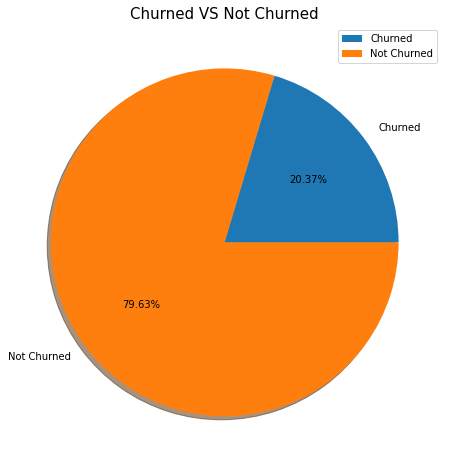

In [7]:
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn'] ==0].count()]
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=['Churned', 'Not Churned'], shadow=True, autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

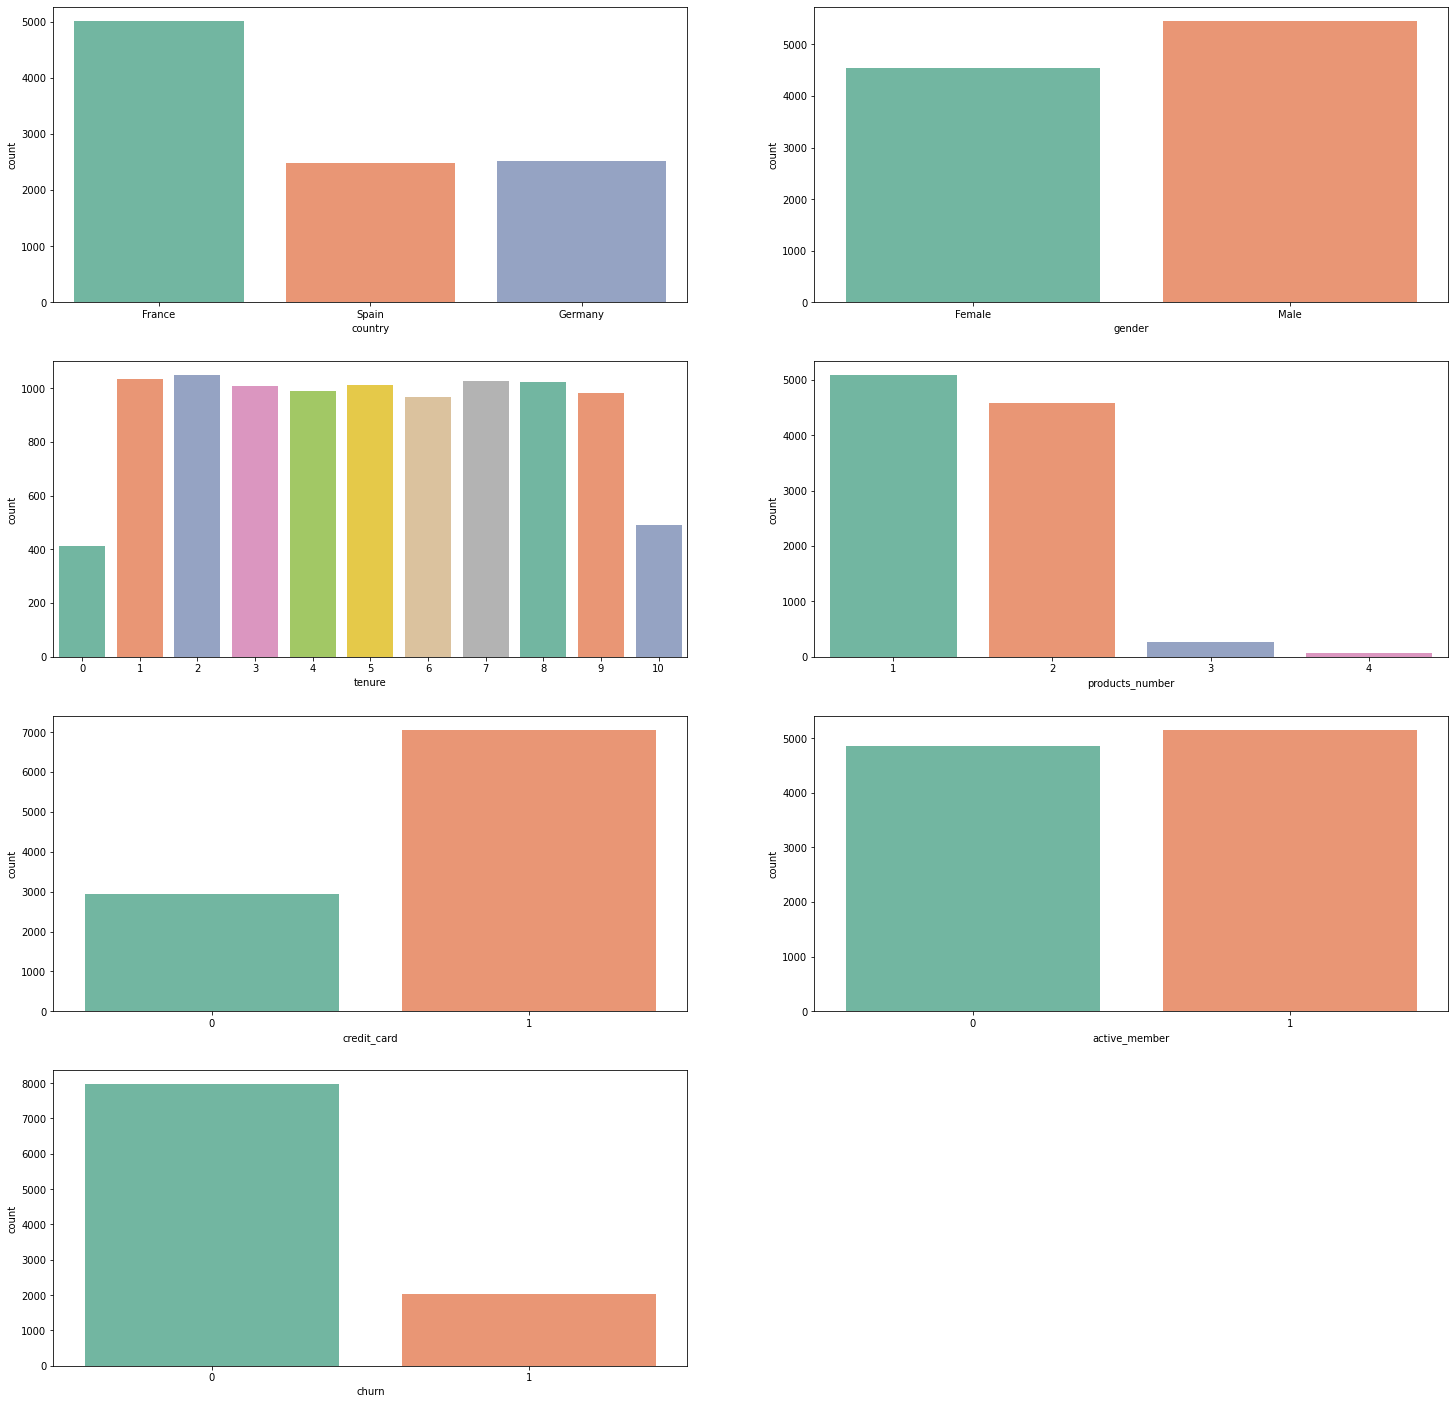

In [8]:
columns = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member', 'churn']

plt.figure(figsize = (25,25))
for i in range(1, len(columns)+1): 
    plt.subplot(4,2,i)
    sns.countplot(x = columns[i-1], palette='Set2', data = df)


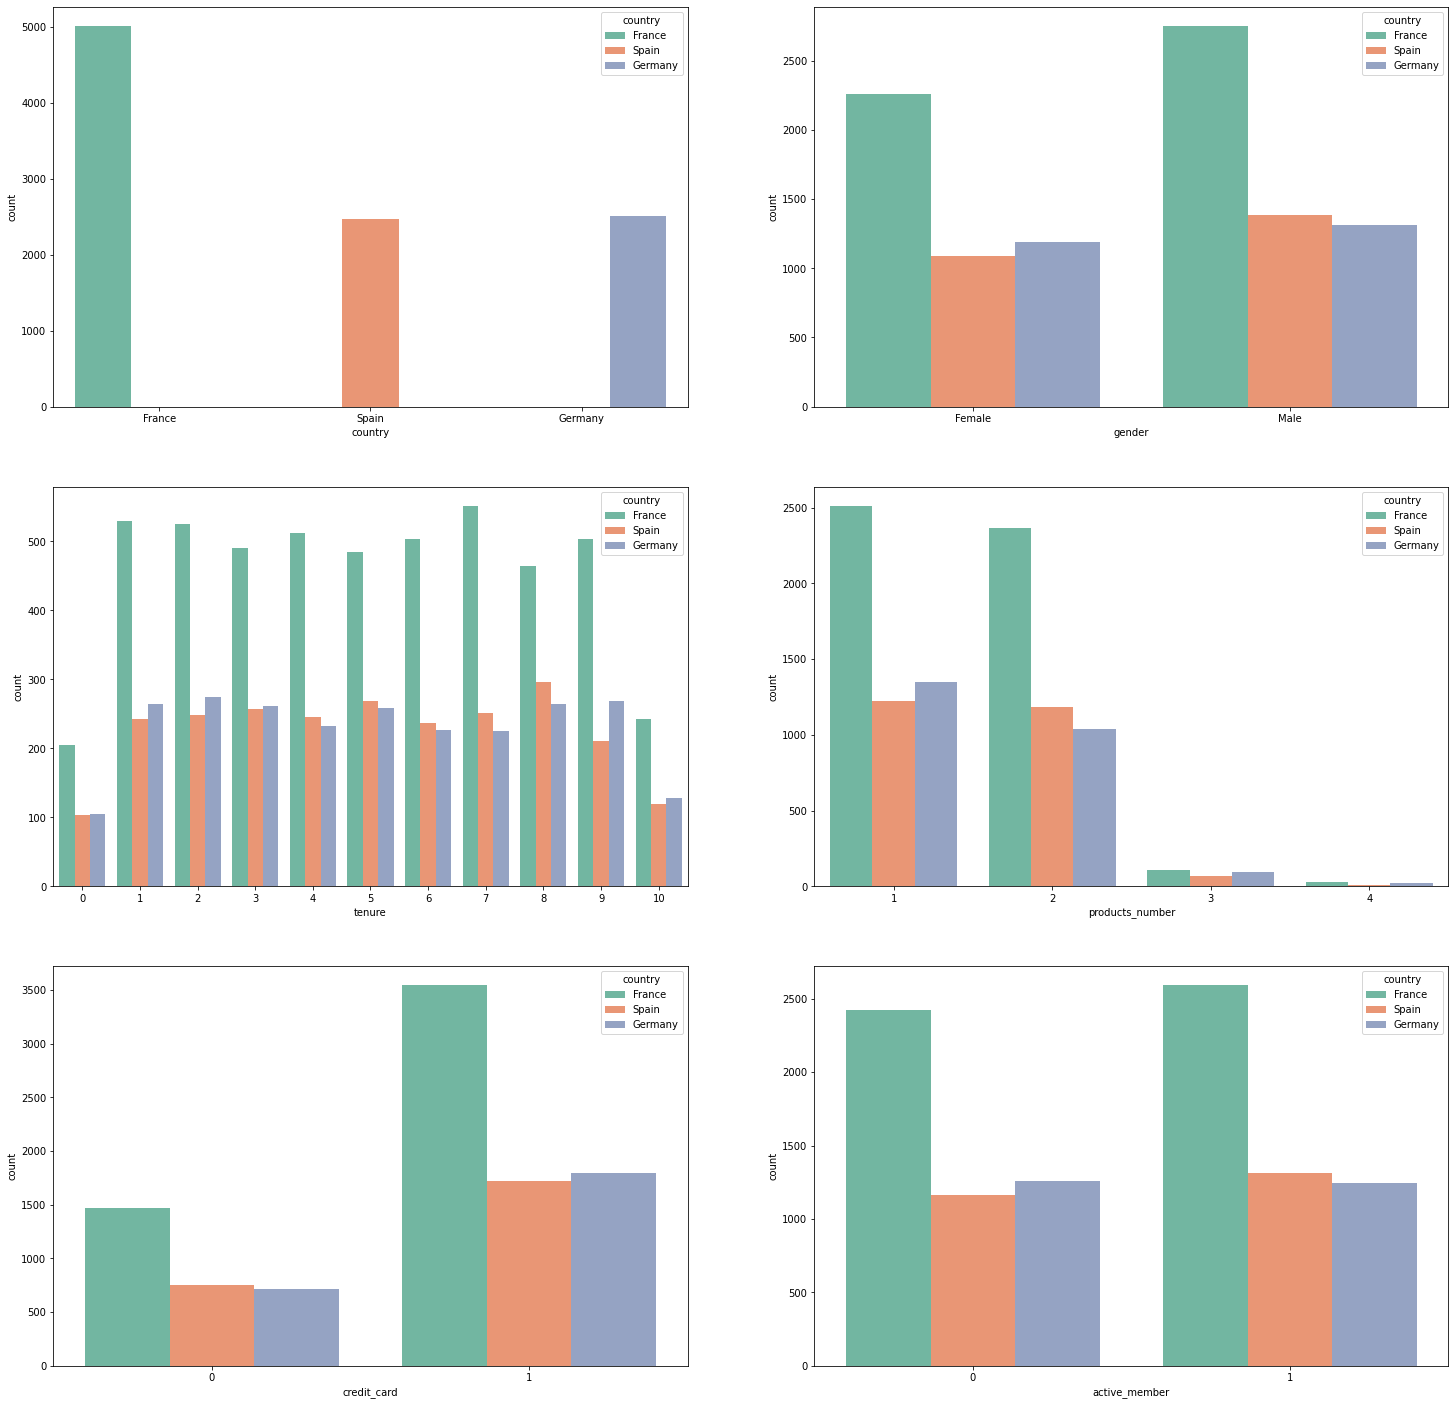

In [9]:
plt.figure(figsize = (25,25))
for i in range(1, len(columns)): 
    plt.subplot(3,2,i)
    sns.countplot(x = columns[i-1], hue= 'country', palette='Set2', data = df)

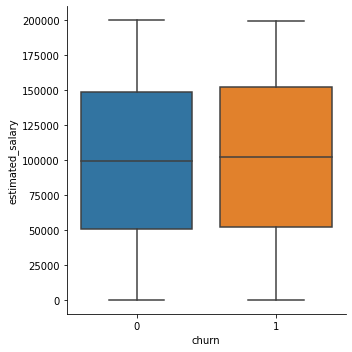

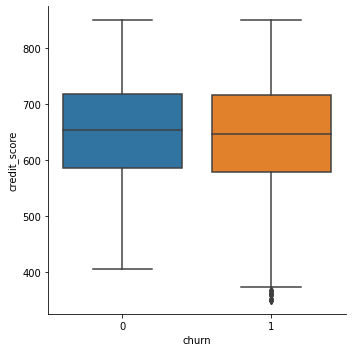

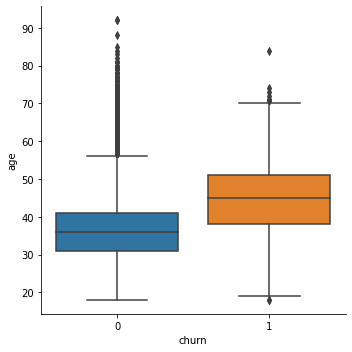

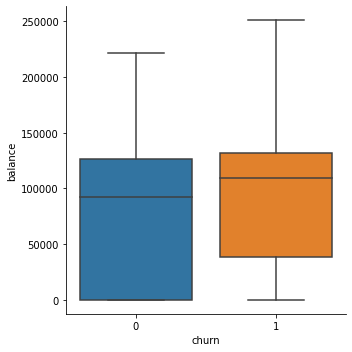

In [10]:
cols = ['credit_score', 'age', 'balance', 'estimated_salary']

for i in range(len(cols)):
    sns.catplot(x = 'churn', y=cols[i-1], kind="box", data = df)

<AxesSubplot:>

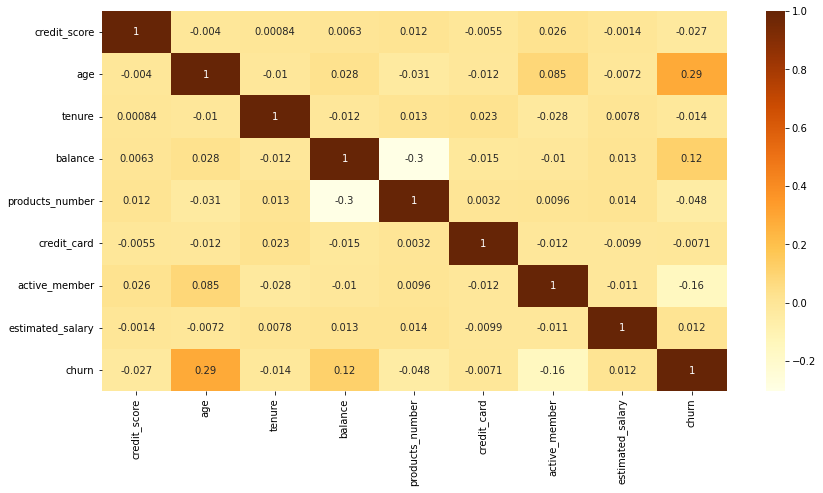

In [11]:
plt.figure(figsize = (14,7))
sns.heatmap(data = df.corr(), annot=True,cmap = "YlOrBr")

### Outlier Detection

In [12]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Column -  credit_score


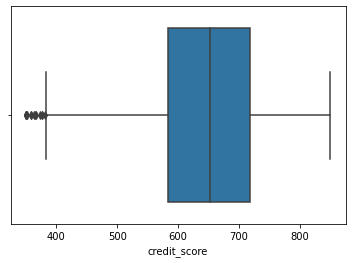

Column -  age


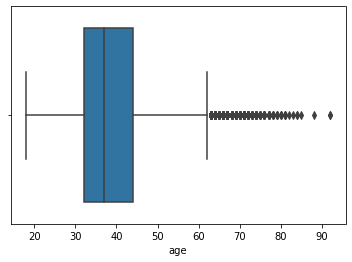

Column -  tenure


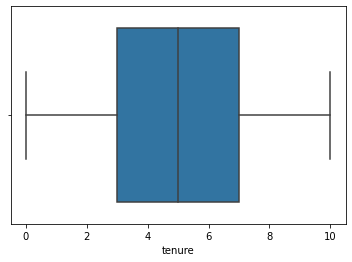

Column -  balance


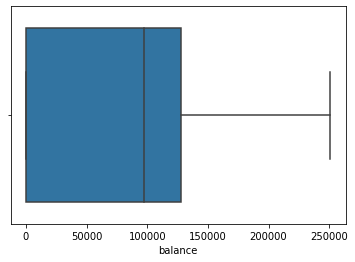

Column -  products_number


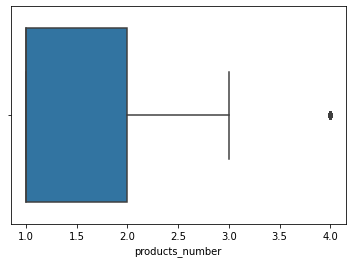

Column -  credit_card


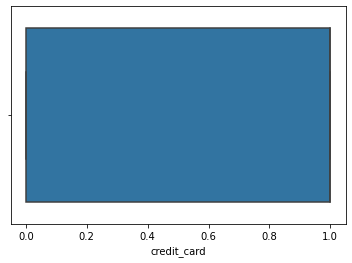

Column -  active_member


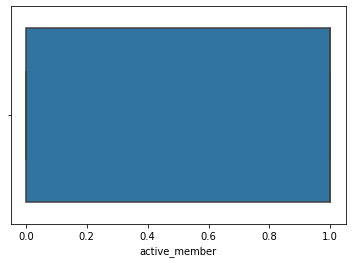

Column -  estimated_salary


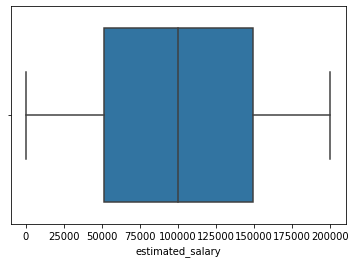

Column -  churn


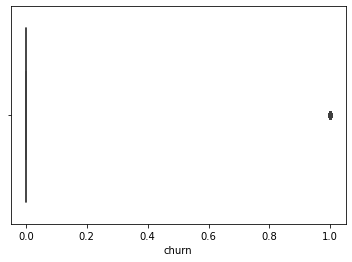

In [13]:
for column in df._get_numeric_data().columns:
    print("Column - ", column)
    sns.boxplot(df[column])
    plt.show()

### Building Model

In [14]:
df = pd.get_dummies(df, columns = ["country", "gender"])

In [15]:
X = df.drop(columns='churn', axis=1)
Y = df['churn']

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler

X_standard = StandardScaler().fit_transform(X)

In [17]:
# Data splitting

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7000, 13) (3000, 13) (7000,) (3000,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [19]:
models=[LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), AdaBoostClassifier(), 
       GradientBoostingClassifier(), XGBClassifier(verbosity=0), GaussianNB(), KNeighborsClassifier()]

In [20]:
def best_randomstate(x,y, models):
    randomstates={}
    for model in models:
        scores={}
        for i in range(1,70):
            xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.25, random_state=i)
            model.fit(xtrain, ytrain)
            Y_test_pred=model.predict(xtest)
            scores[i]=np.round(accuracy_score(ytest, Y_test_pred), 4)
        randomstates[model]=max(scores, key=scores.get)
        print(model, 'done')
    return randomstates

model_randomstate=best_randomstate(X_train, Y_train, models)
model_randomstate

LogisticRegression() done
RandomForestClassifier() done
DecisionTreeClassifier() done
SVC() done
AdaBoostClassifier() done
GradientBoostingClassifier() done
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) done
GaussianNB() done
KNeighborsClassifier() done


{LogisticRegression(): 53,
 RandomForestClassifier(): 1,
 DecisionTreeClassifier(): 49,
 SVC(): 31,
 AdaBoostClassifier(): 67,
 GradientBoostingClassifier(): 69,
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...): 67,
 GaussianNB(): 1,
 KNeighborsClassifier(): 49}

In [21]:
def training_models(x, y, models, randomstate):
    for model in models:
        X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25, random_state=randomstate.get(model))
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Score: {}'.format(np.round(accuracy_score(Y_test, Y_test_pred), 4)))
        print('-----------------------------------------------------')
        
training_models(X_train, Y_train, models, model_randomstate)

LogisticRegression()
Score: 0.8343
-----------------------------------------------------
RandomForestClassifier()
Score: 0.8686
-----------------------------------------------------
DecisionTreeClassifier()
Score: 0.8097
-----------------------------------------------------
SVC()
Score: 0.8691
-----------------------------------------------------
AdaBoostClassifier()
Score: 0.8663
-----------------------------------------------------
GradientBoostingClassifier()
Score: 0.8794
-----------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=

In [22]:
model = GradientBoostingClassifier()
model.fit(X_train,Y_train)

Y_test_pred=model.predict(X_test)
print(model)
print('Score: {}'.format(np.round(accuracy_score(Y_test, Y_test_pred), 4)))

GradientBoostingClassifier()
Score: 0.872


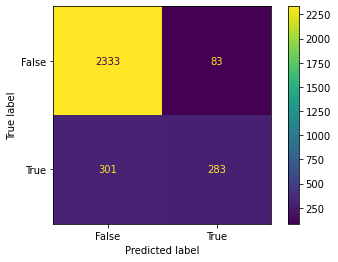

In [23]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
